# Survival Analysis #

## Loading the data with dataframe df and adding columns to data aalso replacing misssing values with Nan. ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Correct path to your data file
file_path = "/Users/rameshchidurala/Documents/DSC-520 Assignments/echocardiogram/echocardiogram.data"

# Defining the column names
df_columns = [
    'survival', 'still_alive', 'age_at_heart_attack', 'pericardial_effusion', 
    'fractional_shortening', 'epss', 'lvdd', 'wall_motion_score', 
    'wall_motion_index', 'mult', 'name', 'group', 'alive_at_1'
]

try:
    # For newer versions of Pandas
    df = pd.read_csv(file_path, names=df_columns, header=None, na_values="?", on_bad_lines='skip')
except TypeError:
    # For older versions of Pandas (if the above fails)
    df = pd.read_csv(file_path, names=df_columns, header=None, na_values="?")

print(df.head())

   survival  still_alive  age_at_heart_attack  pericardial_effusion  \
0      11.0            0                 71.0                     0   
1      19.0            0                 72.0                     0   
2      16.0            0                 55.0                     0   
3      57.0            0                 60.0                     0   
4      19.0            1                 57.0                     0   

   fractional_shortening    epss   lvdd  wall_motion_score  wall_motion_index  \
0                  0.260   9.000  4.600               14.0               1.00   
1                  0.380   6.000  4.100               14.0               1.70   
2                  0.260   4.000  3.420               14.0               1.00   
3                  0.253  12.062  4.603               16.0               1.45   
4                  0.160  22.000  5.750               18.0               2.25   

    mult  name  group  alive_at_1  
0  1.000  name    1.0         0.0  
1  0.588  name

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

print (df.shape)

#Display the information of the DataFrame for a quick overview
print(df.info())

# Display the first few rows of the DataFrame for a quick overview
print("First few rows of the DataFrame:")
print (df.head())



Missing Values:
survival                  1
still_alive               0
age_at_heart_attack       5
pericardial_effusion      0
fractional_shortening     7
epss                     14
lvdd                     10
wall_motion_score         3
wall_motion_index         1
mult                      3
name                      0
group                    22
alive_at_1               57
dtype: int64
(131, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               130 non-null    float64
 1   still_alive            131 non-null    int64  
 2   age_at_heart_attack    126 non-null    float64
 3   pericardial_effusion   131 non-null    int64  
 4   fractional_shortening  124 non-null    float64
 5   epss                   117 non-null    float64
 6   lvdd                   121 non-null    float64
 7   wall_motion_score  

## Data Cleaning ##

Dropped unnecessary columns: mult, name, group, alive_at_1.
Dropped rows with null values in survival and still_alive.
Replaced null values in other columns with their respective means.

In [3]:
# Dropping unnecessary columns: 'mult', 'name', 'group', 'alive_at_1'
df.drop(['mult', 'name', 'group', 'alive_at_1'], axis=1, inplace=True)

# Dropping rows with null values in 'survival' and 'still_alive'
df.dropna(subset=['survival', 'still_alive'], inplace=True)

# Replacing null values in the other columns with their respective means
for col in df.columns:
    if col not in ['survival', 'still_alive']:
        df[col].fillna(df[col].mean(), inplace=True)

# Checking the dataset after cleaning
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 0 to 130
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               130 non-null    float64
 1   still_alive            130 non-null    int64  
 2   age_at_heart_attack    130 non-null    float64
 3   pericardial_effusion   130 non-null    int64  
 4   fractional_shortening  130 non-null    float64
 5   epss                   130 non-null    float64
 6   lvdd                   130 non-null    float64
 7   wall_motion_score      130 non-null    float64
 8   wall_motion_index      130 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 10.2 KB


(None,
    survival  still_alive  age_at_heart_attack  pericardial_effusion  \
 0      11.0            0                 71.0                     0   
 1      19.0            0                 72.0                     0   
 2      16.0            0                 55.0                     0   
 3      57.0            0                 60.0                     0   
 4      19.0            1                 57.0                     0   
 
    fractional_shortening    epss   lvdd  wall_motion_score  wall_motion_index  
 0                  0.260   9.000  4.600               14.0               1.00  
 1                  0.380   6.000  4.100               14.0               1.70  
 2                  0.260   4.000  3.420               14.0               1.00  
 3                  0.253  12.062  4.603               16.0               1.45  
 4                  0.160  22.000  5.750               18.0               2.25  )

In [4]:
print (df.shape)

(130, 9)


## Exploratory Data Analysis (EDA) ##

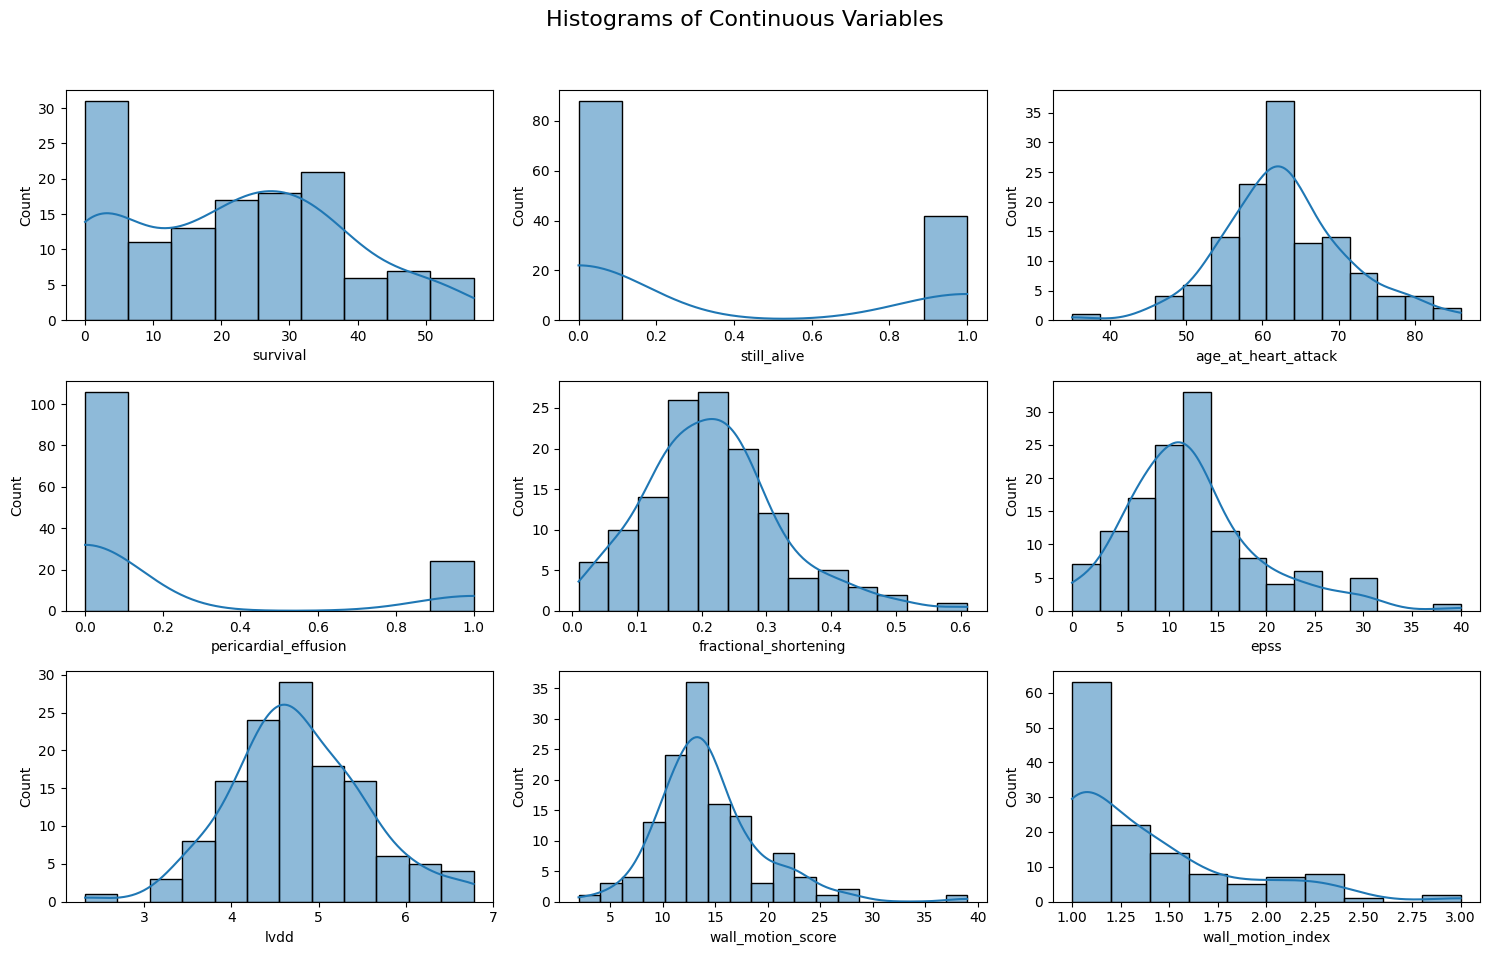

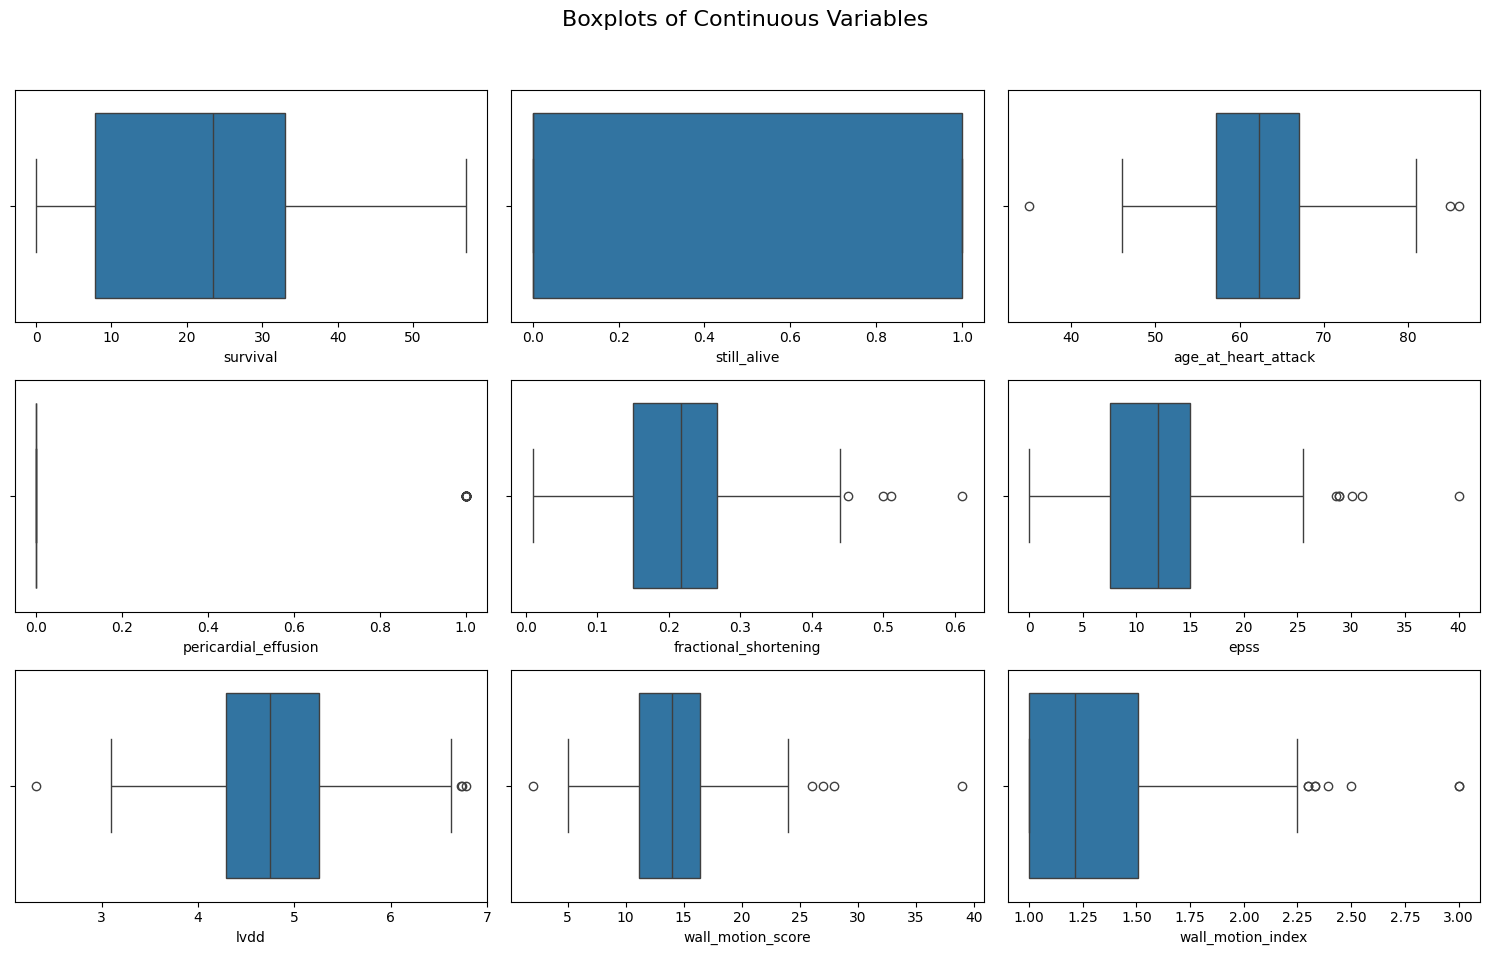

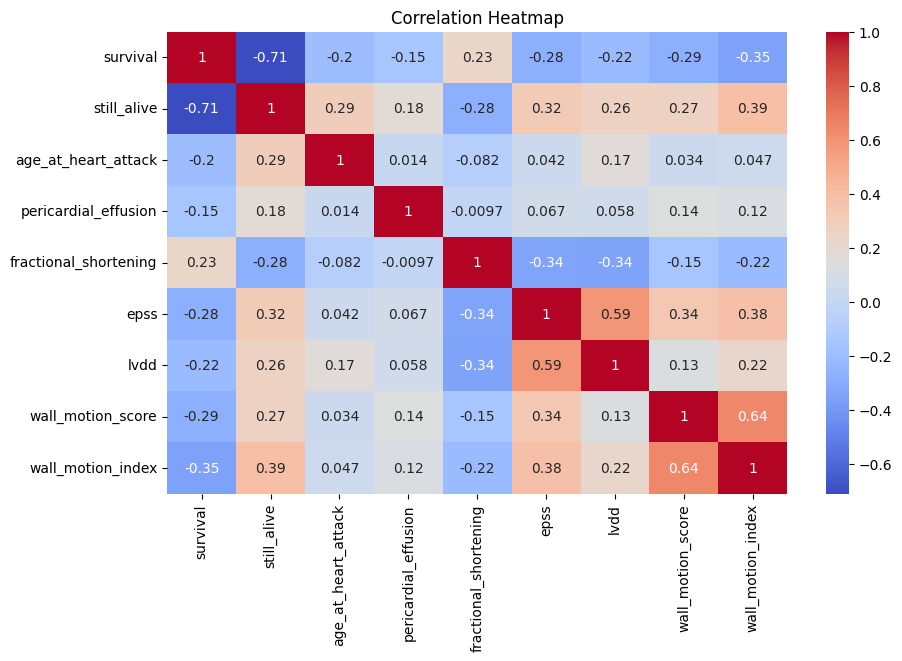

(None,
          survival  still_alive  age_at_heart_attack  pericardial_effusion  \
 count  130.000000   130.000000           130.000000            130.000000   
 mean    22.182923     0.323077            62.828232              0.184615   
 std     15.858267     0.469461             8.210191              0.389486   
 min      0.030000     0.000000            35.000000              0.000000   
 25%      7.875000     0.000000            57.250000              0.000000   
 50%     23.500000     0.000000            62.264500              0.000000   
 75%     33.000000     1.000000            67.000000              0.000000   
 max     57.000000     1.000000            86.000000              1.000000   
 
        fractional_shortening        epss        lvdd  wall_motion_score  \
 count             130.000000  130.000000  130.000000         130.000000   
 mean                0.216870   12.188603    4.769350          14.428425   
 std                 0.104972    6.984658    0.778478        

In [5]:
# Exploratory Data Analysis (EDA)

# Basic statistical summary
statistical_summary = df.describe()

# Histograms for continuous variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Histograms of Continuous Variables', fontsize=16)

cols = df.columns
for i, col in enumerate(cols):
    sns.histplot(df[col], ax=axes[i//3, i%3], kde=True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Boxplots for continuous variables to check for outliers
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Boxplots of Continuous Variables', fontsize=16)

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i//3, i%3])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

plt.show(), statistical_summary



Statistical Summary:

Survival: Mean survival time is approximately 22.18 months with a standard deviation of 15.86 months.
Still Alive: About 32.3% of the patients are still alive.
Age at Heart Attack: Mean age is approximately 62.83 years.
Pericardial Effusion: Present in about 18.5% of patients.
Other Variables (Fractional Shortening, Epss, Lvdd, Wall Motion Score, Wall Motion Index): Show varying levels of central tendency and dispersion.
Visualizations:

Histograms: Provide distribution views of each variable. Some distributions are skewed, indicating the need for careful analysis.
Boxplots: Highlight potential outliers and the spread of data in each variable.
Correlation Heatmap: Offers insights into the relationships between different variables. Note correlations that may influence survival, like fractional shortening.

Based on the Echocardiogram dataset and the initial EDA, let's formulate a research question for survival analysis and proceed with the Kaplan-Meier Estimator and other related analyses. Given the available variables, a relevant question could be:

"Does the presence of pericardial effusion significantly affect the survival time of patients after a heart attack?"

This question aims to explore whether pericardial effusion, a condition where fluid accumulates around the heart, influences the survival outcomes of patients.

Now, let's proceed with the Kaplan-Meier Estimator and related survival analysis steps:

Calculate the Kaplan-Meier Estimator.
Visualize Survival Data with Kaplan-Meier curves.
Generate Kaplan-Meier Curves with the Predictor (stratifying by pericardial effusion).
Perform Log-Rank Analysis to test the difference between survival curves.
Interpret the Results and answer the formulated question.

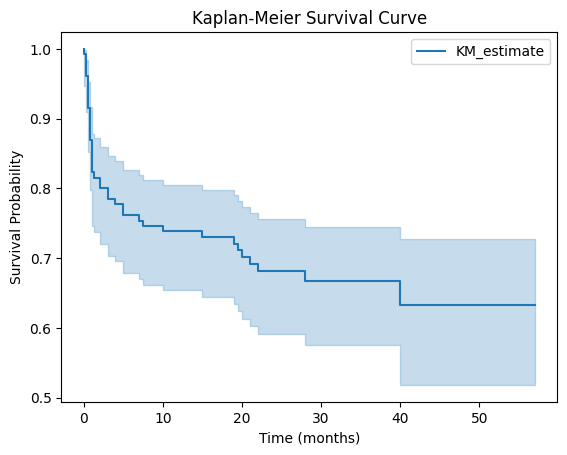

Median survival time: inf
          KM_estimate
timeline             
0.00         1.000000
0.03         0.992308
0.25         0.961538
0.50         0.915385
0.75         0.869231
1.00         0.823077
1.25         0.815385
2.00         0.800000
3.00         0.784615
4.00         0.776923
5.00         0.761538
7.00         0.753846
7.50         0.746154
9.00         0.746154
10.00        0.738381
11.00        0.738381
12.00        0.738381
13.00        0.738381
15.00        0.729796
16.00        0.729796
17.00        0.729796
19.00        0.720558
19.50        0.710950
20.00        0.701343
21.00        0.691602
22.00        0.681722
23.00        0.681722
24.00        0.681722
25.00        0.681722
26.00        0.681722
27.00        0.681722
28.00        0.667809
29.00        0.667809
31.00        0.667809
32.00        0.667809
33.00        0.667809
34.00        0.667809
35.00        0.667809
36.00        0.667809
37.00        0.667809
38.00        0.667809
40.00        0.632661
41.00 

In [12]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fit the data
kmf.fit(durations=df['survival'], event_observed=df['still_alive'])

# Generate Kaplan-Meier Curve
kmf.plot(title='Kaplan-Meier Survival Curve', xlabel='Time (months)', ylabel='Survival Probability')
plt.show()

# Print the median survival time
print("Median survival time:", kmf.median_survival_time_)

# Display the survival function
print(kmf.survival_function_)

# Display the confidence interval
print(kmf.confidence_interval_)


Kaplan-Meier Survival Curve Interpretation:
The Kaplan-Meier curve demonstrates the survival probability of patients over time. The steep initial drop suggests a high rate of event occurrence (in this context, death) shortly after the starting point, which then levels off, indicating that the rate of events decreases over time.

Stratified Kaplan-Meier Curves:

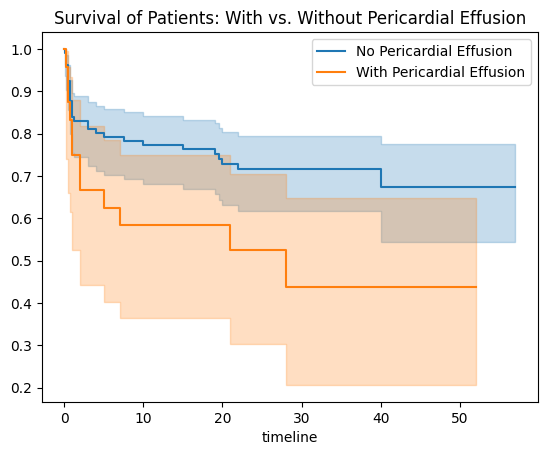

In [7]:
# Stratify by pericardial effusion
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

ax = plt.subplot(111)

# For patients without pericardial effusion
kmf1.fit(durations=df[df['pericardial_effusion'] == 0]['survival'], 
         event_observed=df[df['pericardial_effusion'] == 0]['still_alive'], label='No Pericardial Effusion')
kmf1.plot(ax=ax)

# For patients with pericardial effusion
kmf2.fit(durations=df[df['pericardial_effusion'] == 1]['survival'], 
         event_observed=df[df['pericardial_effusion'] == 1]['still_alive'], label='With Pericardial Effusion')
kmf2.plot(ax=ax)

plt.title('Survival of Patients: With vs. Without Pericardial Effusion')
plt.show()


Stratified Kaplan-Meier Curves Interpretation:
The stratified Kaplan-Meier curves compare the survival probabilities of two groups: patients with pericardial effusion and patients without it.
The group without pericardial effusion appears to have a higher survival probability over time compared to the group with pericardial effusion.
The survival curves suggest that pericardial effusion is associated with a lower survival probability, especially noticeable after approximately 10 months and onwards.

Log-Rank Test:

In [14]:
from lifelines.statistics import logrank_test

# Splitting the data
group1 = df[df['pericardial_effusion'] == 1]
group2 = df[df['pericardial_effusion'] == 0]

# Log-rank test
results = logrank_test(durations_A=group1['survival'], durations_B=group2['survival'], 
                       event_observed_A=group1['still_alive'], event_observed_B=group2['still_alive'])

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.60 0.03      4.97

Log-Rank Test Interpretation:
The log-rank test statistic is 4.60 with a p-value of 0.03. Since the p-value is less than the typical alpha level of 0.05, the result is statistically significant.
This significant p-value suggests that there is a statistically significant difference in the survival distributions between the two groups.
The
The -log2(p) value is approximately 4.97, indicating that the p-value is significant in a binary logarithmic scale, which further emphasizes the significance of the result.

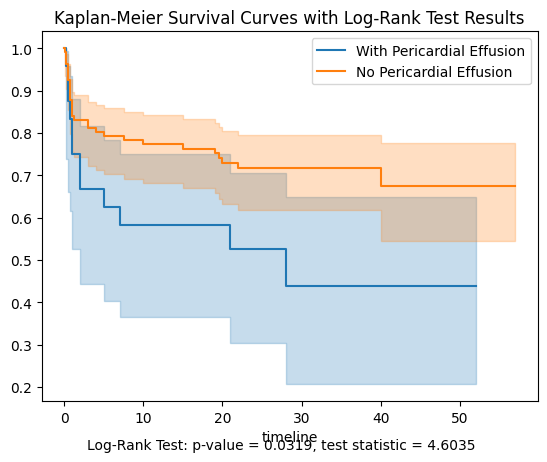

In [21]:
# Extracting p-value and test statistic from the results
p_value = results.p_value
test_statistic = results.test_statistic

# Initialize KaplanMeierFitter for each group
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

# Fit the data for each group
kmf1.fit(durations=group1['survival'], event_observed=group1['still_alive'], label='With Pericardial Effusion')
kmf2.fit(durations=group2['survival'], event_observed=group2['still_alive'], label='No Pericardial Effusion')

# Plot the KM curves for both groups
ax = kmf1.plot()
kmf2.plot(ax=ax)

# Annotate the plot with log-rank test results
plt.title('Kaplan-Meier Survival Curves with Log-Rank Test Results')
plt.figtext(0.5, 0.01, f'Log-Rank Test: p-value = {p_value:.4f}, test statistic = {test_statistic:.4f}', ha='center')

# Show the plot
plt.show()


## Conclusion from Analysis ##
Based on the log-rank test, we can conclude that there is a significant difference in survival times between patients with and without pericardial effusion post-heart attack. Specifically, the presence of pericardial effusion is associated with a worse survival prognosis.

# Answer for Formulated Question #
Yes, the analysis answered the formulated question. The presence of pericardial effusion is associated with a statistically significant decrease in survival time post-heart attack.

# Technical Report on Survival Analysis of Echocardiogram Data #

Abstract

This report presents a comprehensive survival analysis of the Echocardiogram dataset. The objective was to determine whether the presence of pericardial effusion significantly affects the survival time of patients following a heart attack. We employed the Kaplan-Meier estimator
for survival analysis and conducted a log-rank test to compare survival distributions between groups. The results indicate a statistically significant difference in survival times, suggesting that pericardial effusion negatively impacts patient survival.

Introduction

Survival analysis is a branch of statistics that deals with the analysis of time-to-event data. In medical research, it is crucial for understanding factors that influence the time to an event of interest, such as death or relapse. The Echocardiogram dataset, containing data on patients post-heart attack, provides an opportunity to explore the impact of clinical variables on patient survival.

Data Description

The Echocardiogram dataset from the UCI repository includes data on patients who have suffered heart attacks. Variables of interest include survival time, the presence of pericardial effusion, fractional shortening, and other echocardiographic measurements.

Methods

Data Preparation
The data was cleaned by handling missing values, dropping irrelevant columns (mult, name, group, and alive_at_1), and imputing mean in all the columns except 'survival' and 'still alive' also dropped rows with null values in 'survival' and 'still alive' attributes.

Descriptive Analysis
Initial exploration involved summarizing the data with descriptive statistics and visualizing distributions with histograms, boxplots, and a correlation heatmap.

Survival Analysis
The Kaplan-Meier estimator was utilized to generate survival curves, and the log-rank test was applied to compare survival distributions between patients with and without pericardial effusion.

Results

Kaplan-Meier Survival Estimates
The Kaplan-Meier estimator provided a non-parametric representation of the survival function, revealing the probability of survival over time. The survival curve showed an initial rapid decline, suggesting a high event rate following the heart attack, which stabilized over time.

Stratified Analysis
The analysis was stratified based on the presence of pericardial effusion. Two distinct survival curves were plotted, indicating that patients without pericardial effusion had a higher survival probability compared to those with the condition.

Log-Rank Test
A log-rank test was conducted to statistically evaluate the difference in survival distributions. The test statistic was 4.60 with a p-value of 0.03, indicating a statistically significant difference between the two groups.

Discussion

The analysis suggests that pericardial effusion is an important factor in the survival of heart attack patients, with a clear association with decreased survival times. This finding is in line with medical understanding that pericardial effusion can be a serious complication following a heart attack.

Conclusion

The presence of pericardial effusion after a heart attack significantly reduces survival time. This information could be vital for clinicians in risk stratification and management of patients post-heart attack.

Recommendations

Further research should consider multivariate survival analysis to control for confounding factors. Additionally, clinical trials could explore treatments that may improve outcomes for patients with pericardial effusion.

